Here I created a Pie Chart and a barplot for fuelType categorical variable. To create this properly I had to run
some other codes. These are:
    i) importing required libraries and packages.
    ii) Reading a csv file as pandas data frame.
    iii)Checking for missing values, data types of the columns.
    iv)Counting the number of unique values present in the 'fuelType' column.
    v)Finding the percentage of unique values present in the 'fuelType' column.

    After watching the pie chart and the barplot I would say that the barplot is better than the pie chart.
The reasons are:
    a)There are five types of values in 'fuelType' categorical variable. A pie chart is best for 2 or 3 values. As there
are 5 values that's why barplot is suitable for this categorical variable.
    b)We know that barplot is suitable if there is one numeric value. As there is one numeric value that's why
I selected barplot.
    c)In this pie chart some values were overlapped. So we can call it's a bad data visualization. On the other hand, in the barplot values were not overlapped. 
    d)In first impression one can't see the difference in the pie chart values. On the other hand, one can easily
determine the difference from the barplot.


# Importing required libraries and packages

In [87]:
# for data analysis
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')


Reading a csv file as pandas DataFrame

In [88]:
df = pd.read_csv("ford.csv")
print(type(df))
display(df)

<class 'pandas.core.frame.DataFrame'>


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0
...,...,...,...,...,...,...,...,...
17959,Fiesta,2016,7999,Manual,31348,Petrol,54.3,1.2
17960,B-MAX,2017,8999,Manual,16700,Petrol,47.1,1.4
17961,B-MAX,2014,7499,Manual,40700,Petrol,57.7,1.0
17962,Focus,2015,9999,Manual,7010,Diesel,67.3,1.6


Checking for missing values, data types of the columns

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


In [90]:
display(df.describe())

,year,price,mileage,mpg,engineSize
count,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000
mean,2016.864173,12280.078435,23361.880149,57.907832,1.350824
std,2.024987,4741.318119,19471.243292,10.125632,0.432383
min,1996.000000,495.000000,1.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,58.900000,1.200000
75%,2018.000000,15299.000000,31052.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,201.800000,5.000000


Counting the number of unique values present in the 'fuelType' column

In [91]:
print(df["fuelType"].value_counts())

Petrol      12177
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64


Creating the pie chart for the Fuel Type coloumn

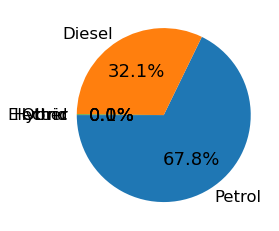

In [92]:
df["fuelType"].value_counts().plot(kind="pie", 
                                       autopct='%1.1f%%', 
                                       startangle=180)
plt.ylabel("")
plt.show()

Finding the percentage of unique values present in the 'fuelType' column

In [93]:
df_fuelType = pd.DataFrame(df["fuelType"].value_counts())
df_fuelType = df_fuelType.reset_index()
df_fuelType = df_fuelType.rename(columns={"index":"fuelType",
                                          "fuelType":"no_of_cars"})

df_fuelType["% of cars"] = (df_fuelType["no_of_cars"]/df.shape[0])*100

df_fuelType = df_fuelType.round(2)

display(df_fuelType)

,fuelType,no_of_cars,% of cars
0,Petrol,12177,67.79
1,Diesel,5762,32.08
2,Hybrid,22,0.12
3,Electric,2,0.01
4,Other,1,0.01


#### Creating a Barplot for the 'fuelType' column

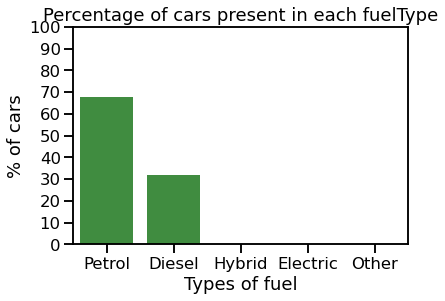

In [94]:
sns.barplot(x="fuelType", 
            y="% of cars", 
            data=df_fuelType, 
            color="green",
            alpha=0.8)

plt.xlabel("Types of fuel")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in each fuelType")

plt.yticks(np.arange(0,101,10))

plt.show()

Creating Two scatterplots with numeric columns.

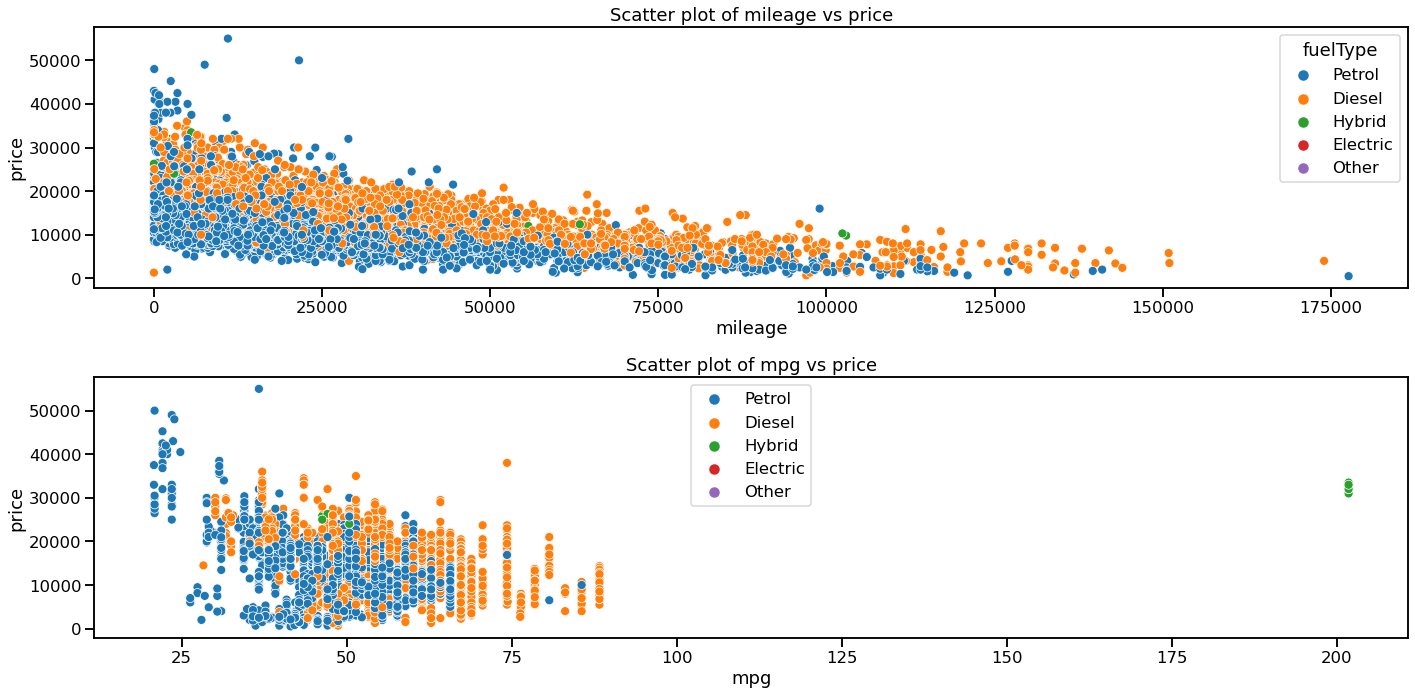

In [95]:
plt.figure(figsize=(20,10))  #In this figure 20 is width and 10 is height.

#Scatterplot of mileage vs price
plt.subplot(2, 1, 1)
sns.scatterplot(x="mileage", y="price", data=df, hue="fuelType")
plt.title('Scatter plot of mileage vs price')

#Scatterplot of mpg vs price
plt.subplot(2, 1, 2)
sns.scatterplot(x="mpg", y="price", data=df, hue="fuelType")
plt.title('Scatter plot of mpg vs price')
plt.legend(loc='upper center')

plt.tight_layout()
plt.show()

To create scatter plot we have to use the seaborn library. Scatter plot needs x and y, which have to be numeric values.
In a scatter plot we can check a correlation between two numeric values.
In scatter plot feature variables are x and target variables are y. That's why I set mileage, mpg in xlabel. And price in y label.
In a scatter plot if x increases and y decreases then it's called negative correlation. if x and y both increase then it's called positive correlation. If we can't correlate anything from x and y then it's called zero correlation.
In mileage vs price scatter plot we can see that price decreases if mileage increases. That's why it's a negative correlation. 
In the mpg vs price scatter plot we can't correlate. That's why it's a zero correlation.
Here I used 'fuelType' column as hue. By using it I can easily say that which fuel car price is more. That's why here hue is playing an important role. After using hue we can say that diesel cars are expensive. Petrol cars are less price. Hybrid car price is in the midrange. Petrol car's mpg is around 20 to 65. Hybrid cars' mpg is 45 to 55, andsome cars are 200 mpg. Diesel car's mpg is around 30 to 90.


Creating Two regression plots with numeric columns.

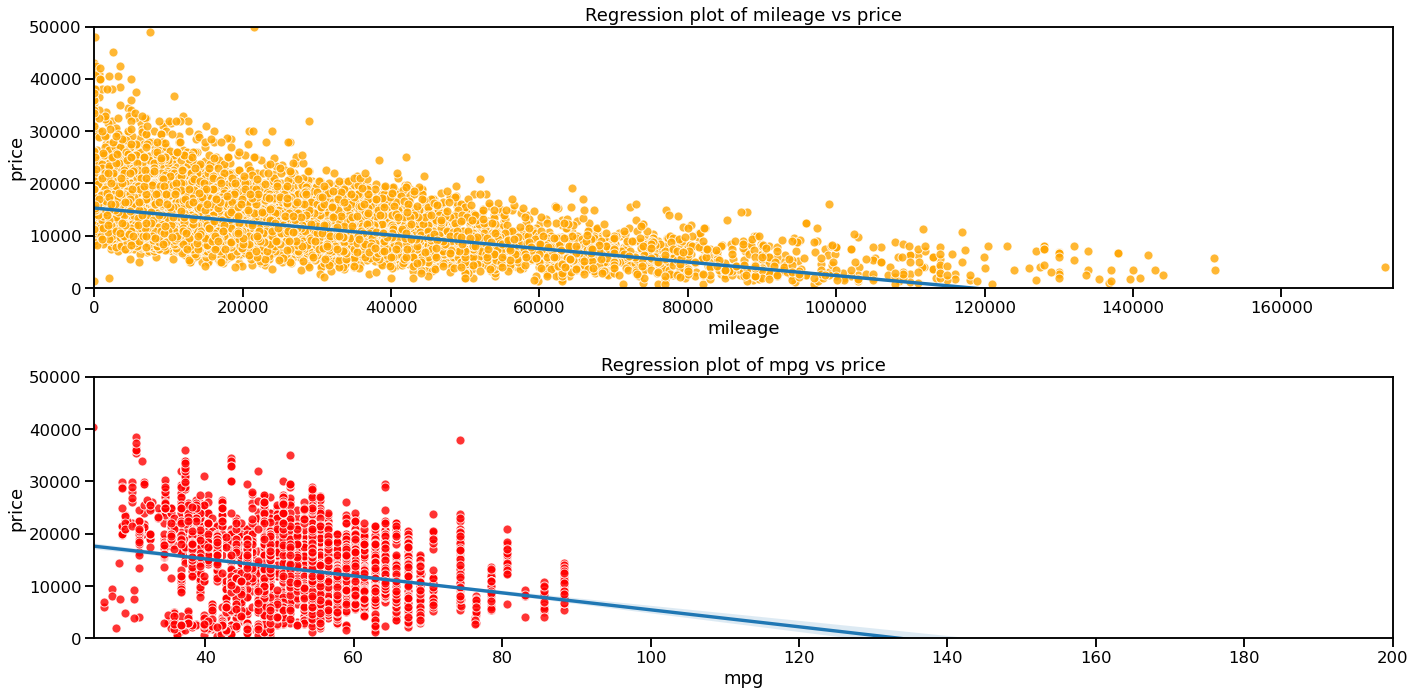

In [96]:
plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1)
sns.regplot(x="mileage", y="price", data=df, scatter_kws={"color":"orange", "edgecolor":"white"})
plt.xlim([0,175000])
plt.ylim([0,50000])
plt.title('Regression plot of mileage vs price')

plt.subplot(2, 1, 2)
sns.regplot(x="mpg", y="price", data=df, scatter_kws={"color":"red", "edgecolor":"white"})
plt.xlim([25,200])
plt.ylim([0,50000])
plt.title('Regression plot of mpg vs price')

plt.tight_layout()
plt.show()

Linear regression is a data plot that graphs the linear relationship between an independent and a dependent variable. It is typically used to visually show the strength of the relationship and the dispersion of results – all for the purpose of explaining the behavior of the dependent variable.
In the regression plot of mileage vs price, we got a straight-line which slop is negative.
In the regression plot of mpg vs price, we got a straight-line which slop is negative.
By these two regressions plots, we can predict the car price based on mileage and mpg.



Creating a Pair plot with numeric columns

<Figure size 2160x1152 with 0 Axes>

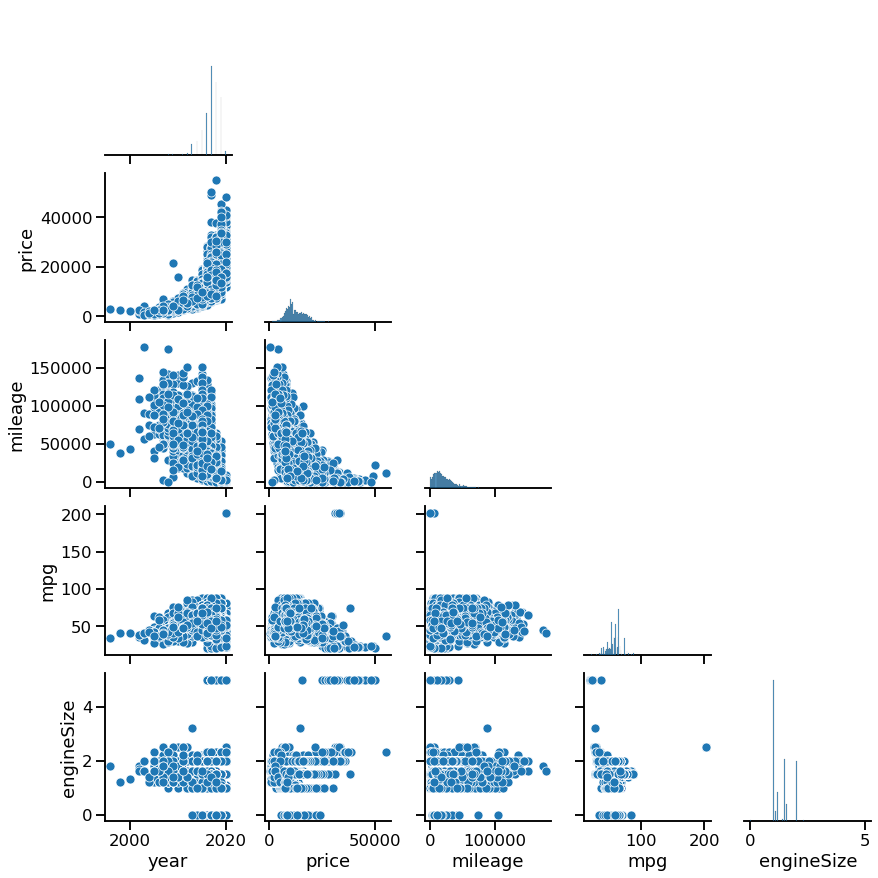

In [97]:
plt.figure(figsize=(30,16))
sns.pairplot(df, corner=True)
plt.show()

Pair Plot:
Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical. Plot pairwise relationships in a data-set. Pairplot is a module of seaborn library which provides a high-level interface for drawing attractive and informative statistical graphics.
To plot multiple pairwise bivariate distributions in a dataset, we can use the pairplot() function. This shows the relationship for (n, 2) combination of variables in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots. 
In the first column if year increases then engineSize increases, mpg increases, price increases.
In the second column if the price decreases then mileage increases


Creating a boxplot:

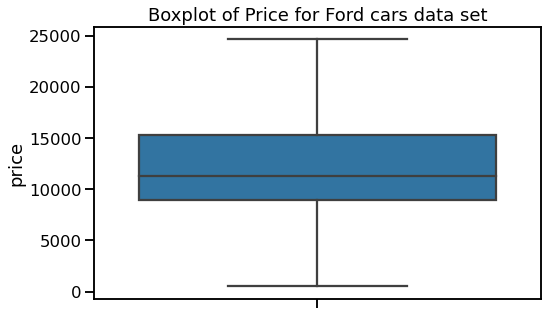

In [98]:
plt.figure(figsize=(8,5))
sns.boxplot(y='price',data=df, showfliers=False)

plt.title("Boxplot of Price for Ford cars data set")
plt.show()

Boxplot:Boxplot is a measure of how well distributed the data in a data set is. It divides the data set into three quartiles. This graph represents the minimum, maximum, median, first quartile and third quartile in the data set. 
It is also useful in comparing the distribution of data across data sets by drawing boxplots for each of them.
We can easily find out :
Minimum price: Around 500 usd.
First Quartile: Around 9000.
Median: ARound 11500
Third Quartile:15000
Maximium Price: Around 24500
Range: maximum-minimum = 24500-500=24000
Inter quartile range= Third quartile - First Quartile=15000-9000=6000

Creating a Histogram:

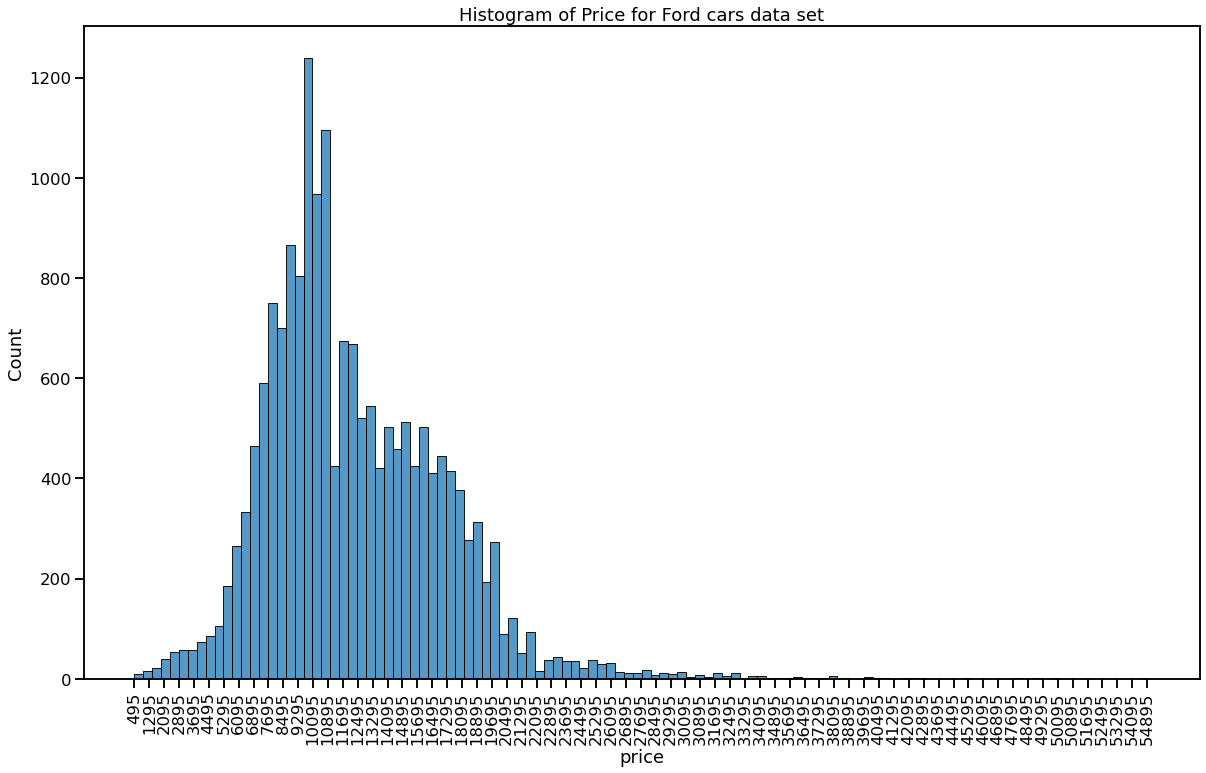

In [99]:
plt.figure(figsize=(20,12))
sns.histplot(x="price", data=df)
plt.xticks(np.arange(df["price"].min(), df["price"].max()+51, 800), rotation=90)
plt.title("Histogram of Price for Ford cars data set")
plt.show()

Histogram: A histogram is a chart that shows frequencies for. intervals of values of a metric variable. Such intervals as known as “bins” and they all have the same widths.
The example above uses 800 usd  as its bin width. So it shows how many cars between 495 usd and 1295, 1295 usd and 2095 usd and so on.

Comparing Histograms and Box Plots:
Although histograms and box plots are collectively part of the chart aid category, they do represent very different types of charts. Both charts effectively represent different data sets; however, in certain situations, one chart may be superior to the other in achieving the goal of identifying variances among data. The type of chart aid chosen depends on the type of data collected, rough analysis of data trends, and project goals
The final set of graphs shows how a box plot can be more useful than a histogram. This occurs when there is moderate variation among the observed frequencies, which causes the histogram to look ragged and non-symmetrical due to the way the data is grouped. This may lead one to assume the data is slightly skewed. However, when a box plot is used to graph the same data points, the chart indicates a perfect normal distribution.
